In [3]:
import os
os.getcwd()
import numpy as np
import matplotlib.pyplot as plt
import csv

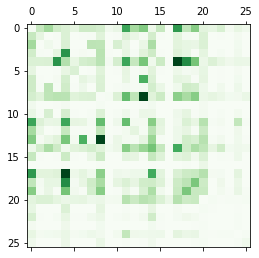

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


In [4]:
# create an empty matrix Ordermat to save the number of each alphabet pair's order
ordermat = np.zeros((26,26))
wordlist = []
with open('/content/drive/MyDrive/Colab Notebooks/system/wordlist2020.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        row = [x for x in row if x !='']
        wordlist.append(row)
        for i in range(len(row)-1):
            ordermat[int(row[i]),int(row[i+1])] += 1 
            
ordermat_t = np.transpose(ordermat).tolist()
ordermat_s = (ordermat + ordermat_t)/2
plt.matshow(ordermat_s, cmap=plt.get_cmap('Greens'), alpha=1)  # , alpha=0.3
plt.show()
distmat = 1/ordermat_s * 1000
distmat = np.nan_to_num(distmat)
for i in range(len(distmat)):
    distmat[i,i] = 0.0
np.savetxt('distance_matrix.csv', distmat, delimiter=',')

In [ ]:
import math
import time

time1 = time.time()
numant = 10
numcity = 26 
alpha = 1  
beta = 5   
rho = 0.1  
Q = 1      
 
iter = 0
itermax = 200
 
etatable = 1.0 / (distmat + np.diag([1e10] * numcity))
pheromonetable = np.ones((numcity, numcity))
pathtable = np.zeros((numant, numcity)).astype(int)
 
numberaver = np.zeros(itermax)
numberbest = np.zeros(itermax) 
numberbest_count = []
pathbest = np.zeros((itermax, numcity))  

def count(best_path_int):
    count = 0
    for i in range(len(wordlist)):
        index = []
        for j in range(len(wordlist[i])):
            element = wordlist[i][j]
            index.append(best_path_int.index(int(element)))
        k = np.diff(index)
        if min(k)>=0:
            count += 1
    return count

while iter < itermax:
    print("iter =",iter)
    if numant <= numcity:
        pathtable[0,:] = np.random.permutation(range(numcity))[:]
    else:
        times = math.floor(numant/numcity)
        for i in range(0, times+1):
            pathtable[i,:] = np.random.permutation(range(numcity))[:]

    length = np.zeros(numant) 
    number = []
    for i in range(numant):
        visiting = pathtable[i, 0] 
        unvisited = set(range(numcity))
        unvisited.remove(visiting) 
        path = []
        for j in range(1, numcity): 
            listunvisited = list(unvisited)
            probtrans = np.zeros(len(listunvisited))
            for k in range(len(listunvisited)):
                probtrans[k] = np.power(pheromonetable[visiting][listunvisited[k]], alpha) \
                               * np.power(etatable[visiting][listunvisited[k]], alpha)
            cumsumprobtrans = (probtrans / sum(probtrans)).cumsum()
 
            cumsumprobtrans -= np.random.rand()
            k = listunvisited[list(cumsumprobtrans > 0).index(True)]
 
            pathtable[i, j] = k
            unvisited.remove(k)
            path.append(visiting)
            visiting = k
        path.append(visiting)
        if count(path) == 0:
            num = 1234567
        else:
            num = 1/count(path)
        number.append(num)
        print(path, count(path))
    numberaver[iter] = sum(number)/len(number)
 

    if iter == 0:
        numberbest[iter] = min(number)
        pathbest[iter] = pathtable[number.index(min(number))].copy()
    else:
        if min(number) > numberbest[iter - 1]:
            numberbest[iter] = numberbest[iter - 1]
            pathbest[iter] = pathbest[iter - 1].copy()
        else:
            numberbest[iter] = min(number)
            pathbest[iter] = pathtable[number.index(min(number))].copy()
    changepheromonetable = np.zeros((numcity, numcity))
    for i in range(numant):
        for j in range(numcity - 1):
            changepheromonetable[pathtable[i, j]][pathtable[i, j + 1]] += Q / distmat[pathtable[i, j]][pathtable[i, j + 1]]
        changepheromonetable[pathtable[i, j + 1]][pathtable[i, 0]] += Q / distmat[pathtable[i, j + 1]][pathtable[i, 0]]

    pheromonetable = (1 - rho) * pheromonetable + changepheromonetable
    iter += 1 
    numberbest_count.append(int(1/min(number)))
time2 = time.time()
print("Finished in", time2-time1)

iter = 0
[4, 17, 19, 8, 18, 13, 20, 6, 24, 10, 11, 0, 12, 3, 14, 7, 2, 1, 22, 23, 15, 9, 5, 16, 21, 25] 391
[0, 8, 14, 17, 4, 24, 13, 6, 7, 2, 18, 3, 12, 20, 19, 11, 1, 15, 22, 5, 23, 21, 10, 9, 25, 16] 298
[0, 15, 12, 8, 4, 11, 18, 19, 14, 6, 17, 2, 24, 25, 13, 20, 9, 1, 10, 22, 3, 7, 5, 23, 21, 16] 586
[0, 2, 20, 13, 14, 11, 4, 17, 6, 8, 22, 7, 19, 1, 21, 12, 18, 3, 24, 5, 15, 23, 9, 10, 25, 16] 649
[0, 22, 8, 12, 4, 3, 10, 13, 6, 14, 11, 5, 20, 19, 24, 18, 7, 2, 16, 17, 1, 15, 25, 21, 23, 9] 593
[0, 6, 14, 3, 8, 17, 4, 7, 18, 19, 15, 12, 1, 11, 2, 10, 24, 13, 20, 23, 5, 22, 25, 9, 21, 16] 474
[0, 12, 14, 20, 11, 1, 4, 3, 8, 7, 2, 15, 18, 17, 22, 13, 6, 24, 19, 5, 10, 9, 25, 16, 21, 23] 632
[0, 12, 18, 19, 7, 8, 1, 4, 17, 14, 13, 10, 2, 20, 11, 6, 24, 22, 15, 3, 5, 9, 25, 21, 23, 16] 811
[0, 17, 14, 10, 4, 18, 7, 2, 20, 12, 3, 8, 15, 11, 1, 22, 13, 5, 24, 19, 6, 9, 25, 21, 23, 16] 612
[0, 11, 18, 4, 14, 17, 5, 13, 3, 24, 19, 20, 9, 1, 8, 12, 15, 7, 2, 10, 22, 6, 21, 23, 25, 16] 466
i

In [ ]:
print(numberbest_count)
plt.plot(numberbest_count)
plt.show()

best_path = pathbest[numberbest_count.index(max(numberbest_count))]
print("best path is", best_path, ", number is", int(1/numberbest[numberbest_count.index(max(numberbest_count))]))